## Imports and loading the datasets

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import string

In [2]:
TheNumbers = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')

In [3]:
RTinfo = pd.read_csv('./zippedData/rt.movie_info.tsv.gz', sep='\t')

In [4]:
RTreviews = pd.read_csv('./zippedData/rt.reviews.tsv.gz', sep='\t', encoding = 'unicode_escape')

## Rotten Tomatoes Movie Info datset

In [5]:
RTinfo.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [6]:
RTinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


### Discovery
Need to discover where the nulls are, convert string numbers to values. Looks like a lot of the Studio values are missing. Currency and box office seem to appear in the same entries, but only for like 20% of the data

### How I might use this data

Would probably compare all other columns to box office, with exception of synopsis, id, and possibly dvd date

### Cleaning the data

## Rotten Tomatoes Reviews dataset

In [7]:
pd.set_option('display.max_rows', 100)
RTreviews.head(100)


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


In [8]:
pd.set_option('display.max_rows', 10)

In [9]:
RTreviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


### Discovery
Rating is not currently a value, will need to be converted to become useful. Many ratings are NaN and will need to be dropped, and many other ratings are letters and will need to be dropped. ratings are sometimes on a different scale (read:denominator), but can be converted to real numbers.

Fresh or rotten seems to exist for each entry

Dates are also strings and need to be normalized to be used

Can id be traced to which movie it represents?

May want a new group for just reviews by top critics

### How I might use this data
Honestly, not sure what I'd do with this data. First thing would probably be to group ids with ratings and fresh indicator, and go from there. Not sure if id can be traced back to the movie title, but the id seem to correspond to individual movies.

### Cleaning the data

## The Number dataset

In [10]:
TheNumbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [11]:
TheNumbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Discovery
All entries in this dataset are non-null. However, all values are strings

### How I might use this data
I will compare release date (as dependent variable) to domestic gross & worldwide gross. And do the same comparison for production budget

### Cleaning the data

In [12]:
punct = '$,'   # `|` is not present here
money_to_num = str.maketrans(dict.fromkeys(punct, ''))

#stripping dollar-sign and commas from relevant objects
TheNumbers['worldwide_gross'] = '|'.join(TheNumbers['worldwide_gross'].tolist()).translate(money_to_num).split('|')
TheNumbers['domestic_gross'] = '|'.join(TheNumbers['domestic_gross'].tolist()).translate(money_to_num).split('|')
TheNumbers['production_budget'] = '|'.join(TheNumbers['production_budget'].tolist()).translate(money_to_num).split('|')

In [13]:
#converting number strings to int64 types
TheNumbers['worldwide_gross'] = TheNumbers['worldwide_gross'].astype(np.int64)
TheNumbers['domestic_gross'] = TheNumbers['domestic_gross'].astype(np.int64)
TheNumbers['production_budget'] = TheNumbers['production_budget'].astype(np.int64)

In [14]:
#convert release date to a datetime
TheNumbers['release_date'] = pd.to_datetime(TheNumbers['release_date'])

### New Metrics


In [15]:
#created variables for domestic profit, worldwide profit, domestic & worldwide profit margins (profit/gross)
#and domestic & worldwide ROIs (profit-production budget)
TheNumbers['domestic_profit'] = TheNumbers['domestic_gross'] - TheNumbers['production_budget']
TheNumbers['worldwide_profit'] = TheNumbers['worldwide_gross'] - TheNumbers['production_budget']
TheNumbers['domestic_margin'] = TheNumbers['domestic_profit'] / TheNumbers['domestic_gross']
TheNumbers['worldwide_margin'] = TheNumbers['worldwide_profit'] / TheNumbers['worldwide_gross']
TheNumbers['domestic_roi'] = TheNumbers['domestic_profit'] / TheNumbers['production_budget']
#makes sense to use value below as ROI
TheNumbers['worldwide_roi'] = TheNumbers['worldwide_profit'] / TheNumbers['production_budget']

In [16]:
TheNumbers['calendar_day'] = TheNumbers['release_date'].astype(str).str.strip().str[-5:]

In [54]:
def getdaynum(cal_day):
    day_list = []
    for entry in cal_day:
        if entry[:2] == '01':
            day_list.append(int(entry[3:]))
        elif entry[:2] == '02':
            day_list.append(int(entry[3:]) + 31)
        elif entry[:2] == '03':
            day_list.append(int(entry[3:]) + 60)
        elif entry[:2] == '04':
            day_list.append(int(entry[3:]) + 91)
        elif entry[:2] == '05':
            day_list.append(int(entry[3:]) + 122)
        elif entry[:2] == '06':
            day_list.append(int(entry[3:]) + 152)
        elif entry[:2] == '07':
            day_list.append(int(entry[3:]) + 182)
        elif entry[:2] == '08':
            day_list.append(int(entry[3:]) + 213)
        elif entry[:2] == '09':
            day_list.append(int(entry[3:]) + 244)
        elif entry[:2] == '10':
            day_list.append(int(entry[3:]) + 274)
        elif entry[:2] == '11':
            day_list.append(int(entry[3:]) + 305)
        elif entry[:2] == '12':
            day_list.append(int(entry[3:]) + 335)
    return pd.Series(day_list)

In [55]:
TheNumbers['release_day_num'] = getdaynum(TheNumbers['calendar_day'])

In [39]:
TheNumbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_margin,worldwide_margin,domestic_roi,worldwide_roi,calendar_day,release_day_num
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,335507625,2351345279,0.441163,0.846921,0.789430,5.532577,12-18,343
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,-0.703283,0.607331,-0.412899,1.546673,05-20,142
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-7.184770,-1.337036,-0.877822,-0.572108,06-07,159
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,0.279748,0.764364,0.388403,3.243841,05-01,123
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,0.488859,0.759251,0.956408,3.153696,12-15,340


In [40]:
TheNumbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   domestic_profit    5782 non-null   int64         
 7   worldwide_profit   5782 non-null   int64         
 8   domestic_margin    5782 non-null   float64       
 9   worldwide_margin   5782 non-null   float64       
 10  domestic_roi       5782 non-null   float64       
 11  worldwide_roi      5782 non-null   float64       
 12  calendar_day       5782 non-null   object        
 13  release_day_num    5782 non-null   int64         
dtypes: datet

## Metrics we want to prioritize

Release date to Profit (domestic & worldwide, profit margin)
Production budget to profit (domestic & worldwide) as well as relationships between production budget & genre, 
and production budget & actors, how production budget correlates to gross vs profit
Large budget profits vs small budget profits

In [123]:
TheNumbers['worldwide_gross'].corr(TheNumbers['worldwide_profit'])

0.9818114885583612

## Some exploratory analysis

### Looking at relationships between production budget & profit metrics, also production budget & revenues

Text(0.5, 1.0, 'Budget v Domestic Profit')

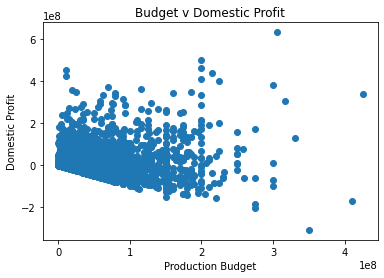

In [27]:
# plot of budget v domestic profit
fig, ax = plt.subplots()


plt.scatter(TheNumbers['production_budget'], TheNumbers['domestic_profit'])


ax.set_xlabel('Production Budget')
ax.set_ylabel('Domestic Profit')

# Add a title for the plot
ax.set_title('Budget v Domestic Profit')

# Add a legend to the plot with legend() in lower right corner
#ax.legend(["Sample Data"], loc=4);

In [26]:
#correlation between production budget and domestic profit
TheNumbers['production_budget'].corr(TheNumbers['domestic_profit'])

0.09974209165512299

Text(0.5, 1.0, 'Budget v Worldwide Profit')

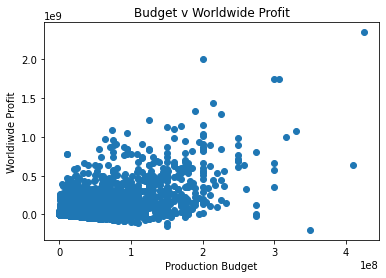

In [29]:
# plot of budget v worldwide profit
fig, ax = plt.subplots()


plt.scatter(TheNumbers['production_budget'], TheNumbers['worldwide_profit'])


ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldiwde Profit')

# Add a title for the plot
ax.set_title('Budget v Worldwide Profit')

# Add a legend to the plot with legend() in lower right corner
#ax.legend(["Sample Data"], loc=4);

In [31]:
#correlation between production budget and worldwide profit
TheNumbers['production_budget'].corr(TheNumbers['worldwide_profit'])

0.608752147171885

Text(0.5, 1.0, 'Budget v Worldwide ROI')

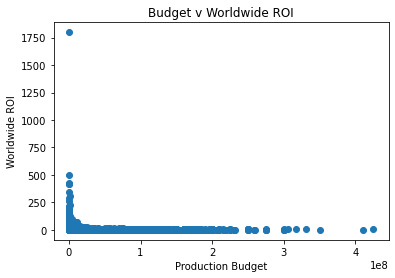

In [76]:
#plot of budget v worldwide ROI
fig, ax = plt.subplots()


plt.scatter(TheNumbers['production_budget'], TheNumbers['worldwide_roi'])


ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide ROI')

# Add a title for the plot
ax.set_title('Budget v Worldwide ROI')

# Add a legend to the plot with legend() in lower right corner
#ax.legend(["Sample Data"], loc=4);

In [77]:
#correlation between production budget and worldwide ROI
TheNumbers['production_budget'].corr(TheNumbers['worldwide_roi'])

-0.04871481362951173

Text(0.5, 1.0, 'Budget v Domestic ROI')

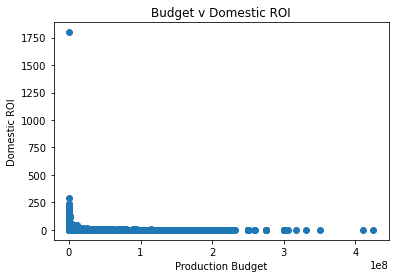

In [79]:
#plot of budget v domestic ROI
fig, ax = plt.subplots()


plt.scatter(TheNumbers['production_budget'], TheNumbers['domestic_roi'])


ax.set_xlabel('Production Budget')
ax.set_ylabel('Domestic ROI')

# Add a title for the plot
ax.set_title('Budget v Domestic ROI')

# Add a legend to the plot with legend() in lower right corner
#ax.legend(["Sample Data"], loc=4);

In [78]:
#correlation between production budget and domestic ROI
TheNumbers['production_budget'].corr(TheNumbers['domestic_roi'])

-0.048021836865109094

Text(0.5, 1.0, 'Budget v Domestic Profit Margin')

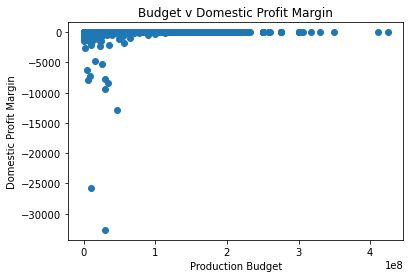

In [30]:
#plot of budget v domestic profit margin
fig, ax = plt.subplots()


plt.scatter(TheNumbers['production_budget'], TheNumbers['domestic_margin'])


ax.set_xlabel('Production Budget')
ax.set_ylabel('Domestic Profit Margin')

# Add a title for the plot
ax.set_title('Budget v Domestic Profit Margin')

# Add a legend to the plot with legend() in lower right corner
#ax.legend(["Sample Data"], loc=4);

In [33]:
#correlation between production budget & domestic profit margin
TheNumbers['production_budget'].corr(TheNumbers['domestic_margin'])

nan

Text(0.5, 1.0, 'Budget v Worldwide Profit Margin')

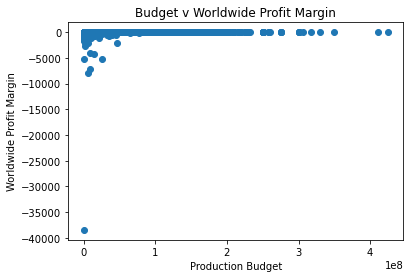

In [34]:
#plot of budget v worldwide profit margin
fig, ax = plt.subplots()


plt.scatter(TheNumbers['production_budget'], TheNumbers['worldwide_margin'])


ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide Profit Margin')

# Add a title for the plot
ax.set_title('Budget v Worldwide Profit Margin')

# Add a legend to the plot with legend() in lower right corner
#ax.legend(["Sample Data"], loc=4);

In [35]:
#correlation between production budget & domestic profit margin
TheNumbers['production_budget'].corr(TheNumbers['worldwide_margin'])

nan

Text(0.5, 1.0, 'Budget v Domestic Gross')

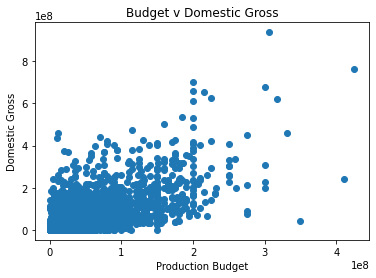

In [36]:
# plot of budget v domestic gross
fig, ax = plt.subplots()


plt.scatter(TheNumbers['production_budget'], TheNumbers['domestic_gross'])


ax.set_xlabel('Production Budget')
ax.set_ylabel('Domestic Gross')

# Add a title for the plot
ax.set_title('Budget v Domestic Gross')

# Add a legend to the plot with legend() in lower right corner
#ax.legend(["Sample Data"], loc=4);

In [37]:
#correlation between production budget and domestic gross
TheNumbers['production_budget'].corr(TheNumbers['domestic_gross'])

0.6856818396752741

Text(0.5, 1.0, 'Budget v Worldwide Gross')

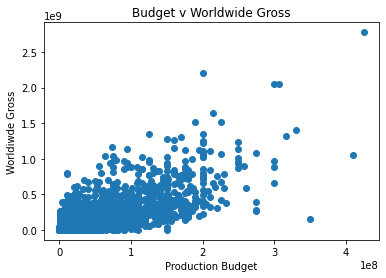

In [38]:
# plot of budget v worldwide gross
fig, ax = plt.subplots()


plt.scatter(TheNumbers['production_budget'], TheNumbers['worldwide_gross'])


ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldiwde Gross')

# Add a title for the plot
ax.set_title('Budget v Worldwide Gross')

# Add a legend to the plot with legend() in lower right corner
#ax.legend(["Sample Data"], loc=4);

In [39]:
#correlation between production budget and worldwide gross
TheNumbers['production_budget'].corr(TheNumbers['worldwide_gross'])

0.7483059765694756

### Production Budget Distribution

Text(0.5, 1.0, 'Production budget')

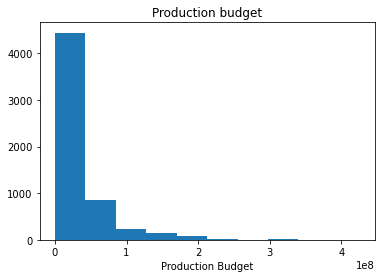

In [80]:
fig, ax = plt.subplots()


plt.hist(TheNumbers['production_budget'])


ax.set_xlabel('Production Budget')

# Add a title for the plot
ax.set_title('Production budget')

# Add a legend to the plot with legend() in lower right corner
#ax.legend(["Sample Data"], loc=4);

In [82]:
TheNumbers['production_budget'].describe()

count    5.782000e+03
mean     3.158776e+07
std      4.181208e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

Blog post that proposes 3 tiers of movie budgets, on basis of how they are financed: 
low (up to 5mil), mid (up to 50mil), high (above 50mil)

for this dataset, it appears that these 3 tiers account for an approximate distribution of: low(~25%) mid(>50%) high(<25%)

post:https://www.studiobinder.com/blog/production-budget/

In [95]:
#creates bucket of low budget films
low_bucket = TheNumbers.loc[TheNumbers['production_budget'] < 5000000 ]

In [84]:
low_bucket

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_margin,worldwide_margin,calendar_day,domestic_roi,worldwide_roi
4400,1,2015-01-23,Mommy,4900000,3498695,17536004,-1401305,12636004,-0.400522,0.720575,2015-01-23,-0.285981,2.578776
4401,2,2008-08-29,Obsluhoval jsem anglickÃ©ho krÃ¡le,4900000,617228,7174984,-4282772,2274984,-6.938720,0.317072,2008-08-29,-0.874035,0.464282
4402,3,2010-08-20,Soul Kitchen,4900000,276901,23347461,-4623099,18447461,-16.695855,0.790127,2010-08-20,-0.943490,3.764788
4403,4,2012-08-17,The Awakening,4900000,95933,6924321,-4804067,2024321,-50.077314,0.292349,2012-08-17,-0.980422,0.413127
4404,5,2008-01-18,All Hat,4900000,15198,15198,-4884802,-4884802,-321.410844,-321.410844,2008-01-18,-0.996898,-0.996898
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,-7000,-7000,-inf,-inf,2018-12-31,-1.000000,-1.000000
5778,79,1999-04-02,Following,6000,48482,240495,42482,234495,0.876243,0.975051,1999-04-02,7.080333,39.082500
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-3662,-3662,-2.736921,-2.736921,2005-07-13,-0.732400,-0.732400
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-1400,-inf,-inf,2015-09-29,-1.000000,-1.000000


In [96]:
#creates bucket of mid budget films
mid_bucket = TheNumbers.loc[(TheNumbers['production_budget'] <= 50000000) & (TheNumbers['production_budget'] > 5000000)]

In [92]:
mid_bucket 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_margin,worldwide_margin,calendar_day,domestic_roi,worldwide_roi
1081,82,2009-11-20,The Twilight Saga: New Moon,50000000,296623634,687557727,246623634,637557727,0.831436,0.927279,2009-11-20,4.932473,12.751155
1082,83,2001-05-18,Shrek,50000000,267655011,491812794,217655011,441812794,0.813192,0.898335,2001-05-18,4.353100,8.836256
1083,84,2012-06-29,Ted,50000000,218665740,556016627,168665740,506016627,0.771340,0.910075,2012-06-29,3.373315,10.120333
1084,85,2014-06-13,22 Jump Street,50000000,191719337,331333876,141719337,281333876,0.739202,0.849095,2014-06-13,2.834387,5.626678
1085,86,1991-06-14,Robin Hood: Prince of Thieves,50000000,165493908,390500000,115493908,340500000,0.697874,0.871959,1991-06-14,2.309878,6.810000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242,43,2017-02-24,The Girl with all the Gifts,5250000,0,4801837,-5250000,-448163,-inf,-0.093332,2017-02-24,-1.000000,-0.085364
4243,44,1944-08-01,Wilson,5200000,2000000,2000000,-3200000,-3200000,-1.600000,-1.600000,1944-08-01,-0.615385,-0.615385
4244,45,2005-08-05,Saint Ralph,5200000,795126,1695126,-4404874,-3504874,-5.539844,-2.067619,2005-08-05,-0.847091,-0.674014
4245,46,2011-04-22,Dum Maaro Dum,5200000,564489,11633427,-4635511,6433427,-8.211871,0.553012,2011-04-22,-0.891444,1.237197


In [97]:
#creates bucket of high budget films
high_bucket = TheNumbers.loc[TheNumbers['production_budget'] > 50000000 ]

In [94]:
high_bucket

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_margin,worldwide_margin,calendar_day,domestic_roi,worldwide_roi
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,335507625,2351345279,0.441163,0.846921,12-18,0.789430,5.532577
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,-0.703283,0.607331,2011-05-20,-0.412899,1.546673
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-7.184770,-1.337036,2019-06-07,-0.877822,-0.572108
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,0.279748,0.764364,2015-05-01,0.388403,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,0.488859,0.759251,2017-12-15,0.956408,3.153696
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,77,2000-06-23,"Me, Myself & Irene",51000000,90570999,149270999,39570999,98270999,0.436906,0.658340,2000-06-23,0.775902,1.926882
1077,78,2006-08-04,Barnyard: The Original Party Animals,51000000,72779000,118583844,21779000,67583844,0.299248,0.569925,2006-08-04,0.427039,1.325173
1078,79,2018-08-17,Alpha,51000000,35851379,99624873,-15148621,48624873,-0.422539,0.488080,2018-08-17,-0.297032,0.953429
1079,80,2006-11-22,Deck the Halls,51000000,35093569,46815807,-15906431,-4184193,-0.453258,-0.089376,2006-11-22,-0.311891,-0.082043


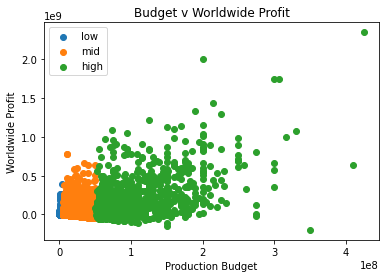

In [100]:
#graph of budget vs profit with buckets
fig, ax = plt.subplots()

ax.scatter(low_bucket['production_budget'], low_bucket['worldwide_profit'], label='low')
ax.scatter(mid_bucket['production_budget'], mid_bucket['worldwide_profit'], label='mid')
ax.scatter(high_bucket['production_budget'], high_bucket['worldwide_profit'], label='high')

ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide Profit')

# Add a title for the plot
ax.set_title('Budget v Worldwide Profit')

plt.legend(loc='upper left');
plt.show()

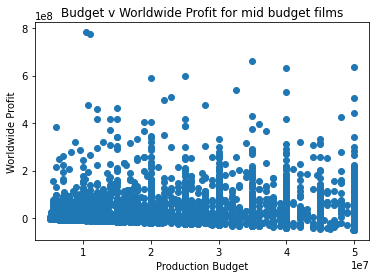

In [104]:
#graph of budget vs profit for mid bucket
fig, ax = plt.subplots()

ax.scatter(mid_bucket['production_budget'], mid_bucket['worldwide_profit'])


ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide Profit')

# Add a title for the plot
ax.set_title('Budget v Worldwide Profit for mid budget films')

#plt.legend(loc='upper left');
plt.show()

In [109]:
mid_bucket['production_budget'].corr(mid_bucket['worldwide_profit'])

0.15700180652371715

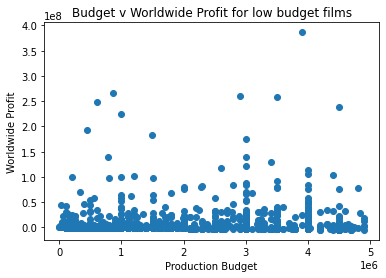

In [103]:
#graph of budget vs profit for low bucket
fig, ax = plt.subplots()

ax.scatter(low_bucket['production_budget'], low_bucket['worldwide_profit'])


ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide Profit')

# Add a title for the plot
ax.set_title('Budget v Worldwide Profit for low budget films')

#plt.legend(loc='upper left');
plt.show()

In [110]:
low_bucket['production_budget'].corr(low_bucket['worldwide_profit'])

0.11703637505455813

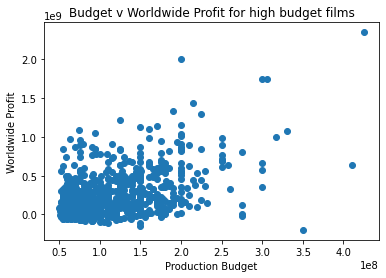

In [105]:
#graph of budget vs profit for high bucket
fig, ax = plt.subplots()

ax.scatter(high_bucket['production_budget'], high_bucket['worldwide_profit'])


ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide Profit')

# Add a title for the plot
ax.set_title('Budget v Worldwide Profit for high budget films')

#plt.legend(loc='upper left');
plt.show()

In [111]:
high_bucket['production_budget'].corr(high_bucket['worldwide_profit'])

0.5352784367314822

In [114]:
TheNumbers.loc[TheNumbers['production_budget'] > 300000000 ]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_margin,worldwide_margin,calendar_day,domestic_roi,worldwide_roi
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,335507625,2351345279,0.441163,0.846921,12-18,0.789430,5.532577
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,-0.703283,0.607331,2011-05-20,-0.412899,1.546673
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-7.184770,-1.337036,2019-06-07,-0.877822,-0.572108
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,0.279748,0.764364,2015-05-01,0.388403,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,0.488859,0.759251,2017-12-15,0.956408,3.153696
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220,0.673308,0.850972,2015-12-18,2.060988,5.710167


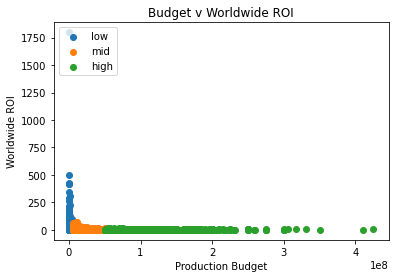

In [115]:
#graph of budget vs roi with buckets
fig, ax = plt.subplots()

ax.scatter(low_bucket['production_budget'], low_bucket['worldwide_roi'], label='low')
ax.scatter(mid_bucket['production_budget'], mid_bucket['worldwide_roi'], label='mid')
ax.scatter(high_bucket['production_budget'], high_bucket['worldwide_roi'], label='high')

ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide ROI')

# Add a title for the plot
ax.set_title('Budget v Worldwide ROI')

plt.legend(loc='upper left');
plt.show()

In [117]:
TheNumbers.loc[TheNumbers['worldwide_roi'] > 50 ]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_margin,worldwide_margin,calendar_day,domestic_roi,worldwide_roi
3464,65,1977-05-25,Star Wars Ep. IV: A New Hope,11000000,460998007,786598007,449998007,775598007,0.976139,0.986016,1977-05-25,40.908910,70.508910
3525,26,1982-06-11,ET: The Extra-Terrestrial,10500000,435110554,792965326,424610554,782465326,0.975868,0.986759,1982-06-11,40.439100,74.520507
4112,13,1978-06-16,Grease,6000000,181813770,387510179,175813770,381510179,0.966999,0.984517,1978-06-16,29.302295,63.585030
4247,48,2002-04-19,My Big Fat Greek Wedding,5000000,241438208,374890034,236438208,369890034,0.979291,0.986663,2002-04-19,47.287642,73.978007
4248,49,2017-02-24,Get Out,5000000,176040665,255367951,171040665,250367951,0.971597,0.980420,2017-02-24,34.208133,50.073590
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5752,53,1991-08-01,Slacker,23000,1227508,1227508,1204508,1204508,0.981263,0.981263,1991-08-01,52.369913,52.369913
5765,66,2001-03-09,Dayereh,10000,673780,673780,663780,663780,0.985158,0.985158,2001-03-09,66.378000,66.378000
5773,74,1993-02-26,El Mariachi,7000,2040920,2041928,2033920,2034928,0.996570,0.996572,1993-02-26,290.560000,290.704000
5774,75,2004-10-08,Primer,7000,424760,841926,417760,834926,0.983520,0.991686,2004-10-08,59.680000,119.275143


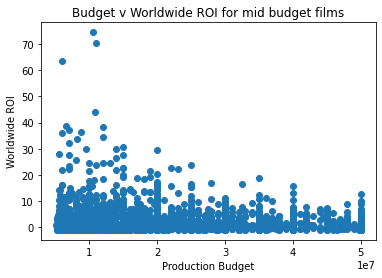

In [120]:
#graph of budget vs roi for mid budget films
fig, ax = plt.subplots()

ax.scatter(mid_bucket['production_budget'], mid_bucket['worldwide_roi'])

ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide ROI')

# Add a title for the plot
ax.set_title('Budget v Worldwide ROI for mid budget films')

#plt.legend(loc='upper left');
plt.show()

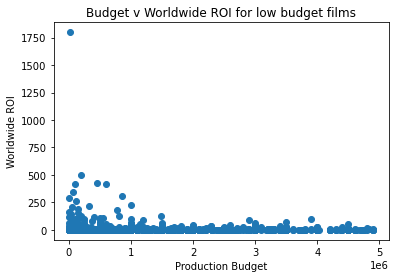

In [119]:
#graph of budget vs roi for low budget films
fig, ax = plt.subplots()

ax.scatter(low_bucket['production_budget'], low_bucket['worldwide_roi'])

ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide ROI')

# Add a title for the plot
ax.set_title('Budget v Worldwide ROI for low budget films')

#plt.legend(loc='upper left');
plt.show()

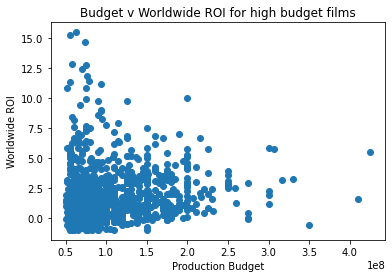

In [121]:
#graph of budget vs roi for high budget films
fig, ax = plt.subplots()

ax.scatter(high_bucket['production_budget'], high_bucket['worldwide_roi'])

ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide ROI')

# Add a title for the plot
ax.set_title('Budget v Worldwide ROI for high budget films')

#plt.legend(loc='upper left');
plt.show()

In [122]:
high_bucket['production_budget'].corr(high_bucket['worldwide_roi'])

0.13017168403756657

In [46]:
gross_by_release = TheNumbers['worldwide_gross'].groupby(TheNumbers['release_day_num']).mean()
gross_by_release

release_day_num
1      1.819482e+07
3      9.090485e+07
4      2.083788e+07
5      4.316624e+07
6      4.601757e+07
           ...     
340    1.419454e+08
341    1.527738e+08
342    1.389295e+08
343    2.338388e+08
344    1.374641e+08
Name: worldwide_gross, Length: 322, dtype: float64

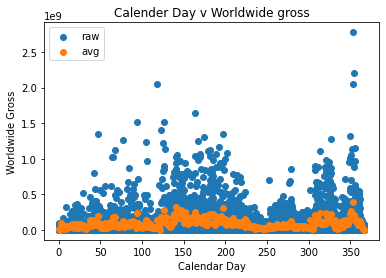

In [98]:
fig, ax = plt.subplots()

plt.scatter(TheNumbers['release_day_num'], TheNumbers['worldwide_gross'], label='raw')
plt.scatter(range(1,367), avg_gross_by_day_list, label='avg')

ax.set_xlabel('Calendar Day')
ax.set_ylabel('Worldwide Gross')

# Add a title for the plot
ax.set_title('Calender Day v Worldwide gross')

# Add a legend to the plot with legend() in lower right corner
plt.legend(loc='upper left')
plt.show()

In [76]:
TheNumbers.loc[TheNumbers['release_day_num'] == 344]['worldwide_gross'].sum()/len(TheNumbers.loc[TheNumbers['release_day_num'] == 344])

90904854.0

Average gross for day 344

In [92]:
avg_gross_by_day_list = []

for x in range(1,367):
    if x in TheNumbers['release_day_num'].value_counts().keys():
        avg_gross_by_day_list.append(TheNumbers.loc[TheNumbers['release_day_num'] == x]['worldwide_gross'].sum()/len(TheNumbers.loc[TheNumbers['release_day_num'] == x]))
    elif x not in TheNumbers['release_day_num'].value_counts().keys():
        avg_gross_by_day_list.append(0)
        
avg_gross_by_day_list

[18194818.790697675,
 0,
 90904854.0,
 20837880.5,
 43166242.833333336,
 46017573.428571425,
 36909876.2,
 19385945.875,
 57845069.45454545,
 29908726.0,
 61270874.0,
 54976587.0,
 40427747.85714286,
 60783008.222222224,
 41990750.058823526,
 80945351.875,
 53377450.81818182,
 63244997.25,
 30608103.555555556,
 81441380.85714285,
 45050389.5,
 77666774.07692307,
 32022990.4,
 30682541.0,
 50051101.3125,
 85213592.16666667,
 62883972.6875,
 40171750.083333336,
 63038952.583333336,
 26101506.529411763,
 23502174.375,
 20898292.944444444,
 18335136.692307692,
 29223875.25,
 61328933.333333336,
 58165314.84615385,
 68117856.8125,
 136324755.1111111,
 59849058.0,
 128947621.91666667,
 132398358.75,
 68801254.1111111,
 120871278.83333333,
 105990826.0,
 123069047.61904761,
 63946069.90909091,
 200373851.1,
 91753075.53846154,
 80106895.76923077,
 80098437.13333334,
 26141842.727272727,
 25504395.166666668,
 56684150.625,
 30222066.85714286,
 34080412.875,
 93870989.8,
 33204061.285714287,
 3

For loop that creates list of averages of worldwide gross in order of calendar day value (1-366)

In [93]:
TheNumbers.loc[TheNumbers['release_day_num'] == 366]['worldwide_gross'].sum()/len(TheNumbers.loc[TheNumbers['release_day_num'] == 366])

5309147.403314917

Text(0.5, 1.0, 'Calender Day v Worldwide gross')

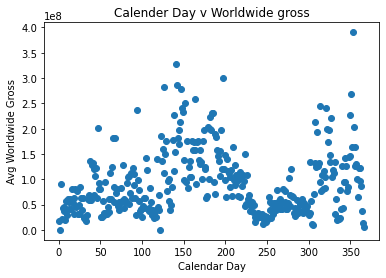

In [94]:
fig, ax = plt.subplots()

plt.scatter(range(1,367), avg_gross_by_day_list)


ax.set_xlabel('Calendar Day')
ax.set_ylabel('Avg Worldwide Gross')

# Add a title for the plot
ax.set_title('Calender Day v Worldwide gross')

# Add a legend to the plot with legend() in lower right corner
#ax.legend(["Sample Data"], loc=4);